In [1]:
import openpathsampling as p
from IPython.display import SVG
import openpathsampling.visualize as vis

In [2]:
st = p.Storage('mstis.nc', mode='r')

In [3]:
scheme = st.schemes.first

In [4]:
reload(vis)

<module 'openpathsampling.visualize' from '/Users/jan-hendrikprinz/Studium/git/openpathsampling/openpathsampling/visualize.pyc'>

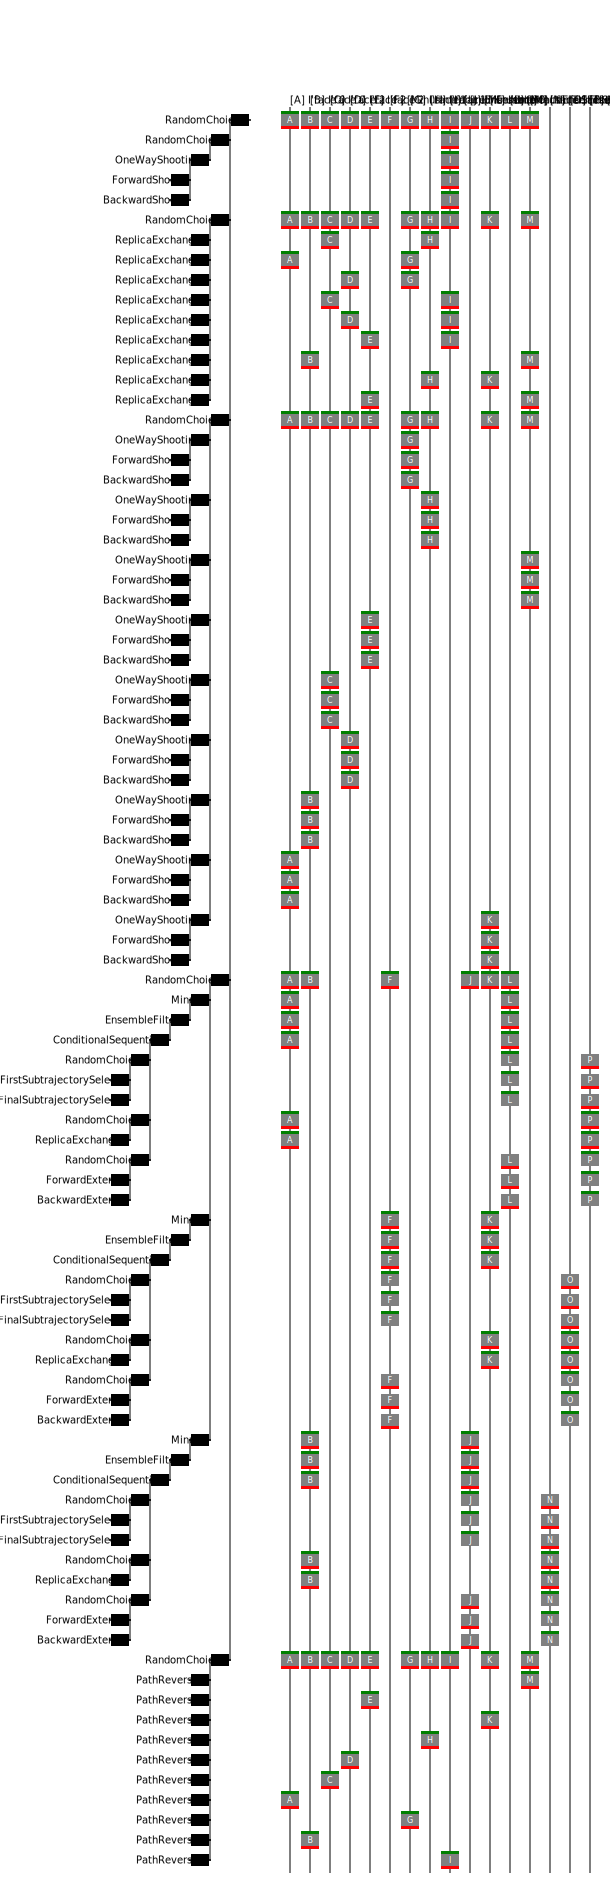

In [5]:
builder = vis.MoveTreeBuilder.from_scheme(scheme)
builder.options.analysis['only_canonical'] = False
SVG(builder.svg())

In [4]:
nn = mover[0][3][0][0][0]
print nn
print mover[0][3][0].mover
mover[0][3][0].mover = nn

ConditionalSequential
EnsembleFilter


In [6]:
scheme = st.schemes[0]
ens = ens = list(scheme.find_used_ensembles()) + list(scheme.find_hidden_ensembles())

In [7]:
%%time
qq = mover.in_out_matrix

CPU times: user 3.81 ms, sys: 927 µs, total: 4.74 ms
Wall time: 4.16 ms


In [8]:
m = mover[0][3][1][0][0]

m0 = m[0]
m1 = m[1]
m2 = m[2]

io0 = m0.in_out_matrix
io1 = m1.in_out_matrix
io2 = m2.in_out_matrix

io = io0 + io1 + io2
for q in io:
    if q.essential:
        print '++'
        for l in q:
            print ens.index(l[0][0]), '->', ens.index(l[0][1])
    else:
        print '--'
    


--
++
8 -> 12
12 -> 8
--
--
--
--


In [7]:
from collections import Counter

In [8]:
qq.is_constant

True

In [9]:
%%time
q = mover.in_out_matrix

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 11.2 µs


In [28]:
sset = st.steps[0].active

In [29]:
rs = p.pathmover.ReplicaState.from_sampleset(sset)
d = dict(p.pathmover.ReplicaState.from_sampleset(sset))
for s in d:
    d[s] = 2
rs2 = p.pathmover.ReplicaState(d.items())

In [30]:
def get_sub_used(mover, replica_states, level):
    l = [(mover, level, replica_states)]
    subs = mover.sub_replica_state(replica_states)
#     print mover, subs
    map(lambda x, y, z : l.extend(get_sub_used(x, y, z)), mover.submovers, subs, [1 + level] * len(mover.submovers))
    return l

In [31]:
scheme = st.schemes[0]
mms = list(mover)

In [32]:
m = mms[64]
print m
m.move_replica_state(rs)

ForwardExtend


{frozenset({(<openpathsampling.ensemble.MinusInterfaceEnsemble at 0x126d45350>,
             2),
            (<openpathsampling.ensemble.MinusInterfaceEnsemble at 0x126d46d90>,
             1),
            (<openpathsampling.ensemble.MinusInterfaceEnsemble at 0x126d67850>,
             1),
            (<openpathsampling.ensemble.TISEnsemble at 0x1268d0810>, 1),
            (<openpathsampling.ensemble.TISEnsemble at 0x1268e2050>, 1),
            (<openpathsampling.ensemble.TISEnsemble at 0x1268f3510>, 1),
            (<openpathsampling.ensemble.TISEnsemble at 0x1268f3c10>, 1),
            (<openpathsampling.ensemble.TISEnsemble at 0x1268f3c90>, 1),
            (<openpathsampling.ensemble.TISEnsemble at 0x1268ff310>, 1),
            (<openpathsampling.ensemble.TISEnsemble at 0x1268ffdd0>, 1),
            (<openpathsampling.ensemble.TISEnsemble at 0x1268ffe10>, 1),
            (<openpathsampling.ensemble.TISEnsemble at 0x126d305d0>, 1),
            (<openpathsampling.ensemble.UnionEnsembl

In [36]:
rs3 = p.pathmover.ReplicaState(Counter(scheme.find_used_ensembles() | scheme.find_hidden_ensembles()).items())

NameError: name 'Counter' is not defined

In [39]:
ee = get_sub_used(mover, set([rs2]), 0)

In [48]:
len(ee[10][2])

1

In [52]:
from collections import Counter

In [57]:
Counter(dict(next(iter(subs)))) > mover.in_out_matrix.minimal

True

In [59]:
type(next(iter(subs)))

openpathsampling.pathmover.ReplicaState

In [50]:
ens = ens = list(scheme.find_used_ensembles()) + list(scheme.find_hidden_ensembles())
print
for no, (m, level, subs) in enumerate(get_sub_used(mover, set([rs2]), 0)):
    print '{:>3}'.format(no), '   ' * level, '{:<40}   '.format(m), ' ' * (28 - 3 * level),
    first = True
    for sub in subs:
        if first:
            first = False
        else:
            print ' ' * 68, '', '',
        f = dict(sub)
        for e in ens:
            print f[e] if e in f else '-',
        
    print 


  0  RootMover                                                                2 2 2 2 2 2 2 2 2 2 2 2 2 - - -
  1     Ms_outer_shootingChooser                                              2 2 2 2 2 2 2 2 2 2 2 2 2 - - -
  2        OneWayShootingMover [UnionEnsemble]                                2 2 2 2 2 2 2 2 2 2 2 2 2 - - -
  3           ForwardShoot                                                    2 2 2 2 2 2 2 2 2 2 2 2 2 - - -
  4           BackwardShoot                                                   2 2 2 2 2 2 2 2 2 2 2 2 2 - - -
  5     RepexChooser                                                          2 2 2 2 2 2 2 2 2 2 2 2 2 - - -
  6        ReplicaExchange                                                    2 2 2 2 2 2 2 2 2 2 2 2 2 - - -
  7        ReplicaExchange                                                    2 2 2 2 2 2 2 2 2 2 2 2 2 - - -
  8        ReplicaExchange                                                    2 2 2 2 2 2 2 2 2 2 2 2 2 - - -
  9      

In [47]:
ens = ens = list(scheme.find_used_ensembles()) + list(scheme.find_hidden_ensembles())
print 'MINIMAL INPUT ENSEMBLES'

for no, (m, level, subs) in enumerate(get_sub_used(mover, set([rs2]), 0)):
    print '{:>3}'.format(no), '   ' * level, '{:<35}   '.format(m), ' ' * (21 - 3 * level),
    first = True
    inout = m.in_out_matrix
    print 'IN[{:>3}] '.format(len(inout.minimal)),
    
#     print map(type, inout)
        
    ins = [inout.minimal]
#     print len(ins)
    for sub in ins:
        if first:
            first = False
        else:
            print ' ' * (35 + 21 + 16), '', '',
            
#         print sub
        f = dict(sub)
        for e in ens:
            print f[e] if e in f else '-',
        
        print 

MINIMAL INPUT ENSEMBLES
  0  RootMover                                                    IN[ 13]  1 1 1 1 1 1 1 1 1 1 1 1 1 - - -
  1     Ms_outer_shootingChooser                                  IN[  1]  - - - - - - - - 1 - - - - - - -
  2        OneWayShootingMover [UnionEnsemble]                    IN[  1]  - - - - - - - - 1 - - - - - - -
  3           ForwardShoot                                        IN[  1]  - - - - - - - - 1 - - - - - - -
  4           BackwardShoot                                       IN[  1]  - - - - - - - - 1 - - - - - - -
  5     RepexChooser                                              IN[ 10]  1 1 1 1 1 1 1 - 1 - 1 1 - - - -
  6        ReplicaExchange                                        IN[  2]  - 1 - - - - 1 - - - - - - - - -
  7        ReplicaExchange                                        IN[  2]  - - - - 1 1 - - - - - - - - - -
  8        ReplicaExchange                                        IN[  2]  - - - - 1 - - - - - 1 - - - - -
  9        Re

In [21]:
ens = ens = list(scheme.find_used_ensembles()) + list(scheme.find_hidden_ensembles())
print 'MAXIMAL USED INPUT ENSEMBLES'

for no, (m, level, subs) in enumerate(get_sub_used(mover, set([rs2]), 0)):
    print '{:>3}'.format(no), '   ' * level, '{:<35}   '.format(m), ' ' * (21 - 3 * level),
    first = True
    inout = m.in_out_matrix
    print 'IN[{:>3}] '.format(len(inout.ins)),
    
#     print map(type, inout)
        
    ins = [inout.ins]
#     print len(ins)
    for sub in ins:
        if first:
            first = False
        else:
            print ' ' * (35 + 21 + 16), '', '',
            
#         print sub
        f = dict(sub)
        for e in ens:
            print f[e] if e in f else '-',
        
        print 

MAXIMAL USED INPUT ENSEMBLES
  0  PathSimulator                                                IN[ 13]  1 1 1 1 1 1 1 1 1 1 1 1 1 - - -
  1     RootMover                                                 IN[ 13]  1 1 1 1 1 1 1 1 1 1 1 1 1 - - -
  2        Ms_outer_shootingChooser                               IN[  1]  1 - - - - - - - - - - - - - - -
  3           OneWayShootingMover [UnionEnsemble]                 IN[  1]  1 - - - - - - - - - - - - - - -
  4              ForwardShoot                                     IN[  1]  1 - - - - - - - - - - - - - - -
  5              BackwardShoot                                    IN[  1]  1 - - - - - - - - - - - - - - -
  6        RepexChooser                                           IN[ 10]  1 1 1 1 1 1 1 1 1 - - - 1 - - -
  7           ReplicaExchange                                     IN[  2]  - 1 - 1 - - - - - - - - - - - -
  8           ReplicaExchange                                     IN[  2]  - - - - - - 1 - - - - - 1 - - -
  9     

In [22]:
ens = list(scheme.find_used_ensembles()) + list(scheme.find_hidden_ensembles())
print 'POSSIBLE INPUT ENSEMBLES'

for no, (m, level, subs) in enumerate(get_sub_used(mover, set([rs2]), 0)):
    print '{:>3}'.format(no), '   ' * level, '{:<35}   '.format(m), ' ' * (21 - 3 * level),
    first = True
    inout = m.in_out_matrix
    print 'IN[{:>3}] '.format(len(inout.ins)),
    
#     print map(type, inout)
        
    ins = {p.pathmover.ReplicaState((io.ins & Counter(dict(sub))).items()) for io in inout for sub in subs}
    
#     print len(ins)
    for sub in ins:
        if first:
            first = False
        else:
            print ' ' * (35 + 21 + 16), '', '',
            
#         print sub
        f = dict(sub)
        for e in ens:
            print f[e] if e in f else '-',
        
        print 

POSSIBLE INPUT ENSEMBLES
  0  PathSimulator                                                IN[ 13]  - 1 - - - - - - - - - - - - - -
                                                                           - - 1 - - - - 1 - - - - - - - -
                                                                           - - - - - - - - 1 - - - - - - -
                                                                           1 - - - 1 - - - - - - - - - - -
                                                                           - - - - 1 - - - - - - - - - - -
                                                                           - - - - - - 1 - - - - - - - - -
                                                                           - - - - - - - - 1 - 1 - - - - -
                                                                           - - - - - 1 1 - - - - - - - - -
                                                                           - - 1 - - - - - - - - 1 - - - -
            

In [23]:
def show_in_out(mover):
    print 
    if isinstance(mover, p.PathMover):
        m = mover.in_out_matrix
    else:
        m = [mover]
    for no, possibility in enumerate(m):
        first = True
        for v in possibility:
            if first:
                print '# %3d' % no,
                first = False
            else:
                print '     ',
                
            print '[{:>3}x] {:>25} ({:>4}) -> {:>25} ({:>4})'.format(v[1], v[0][0].name, st.idx(v[0][0]), v[0][1].name, st.idx(v[0][1]))

In [24]:
show_in_out(mover)


#   0 [  1x]                  I'face 1 (  70) ->                  I'face 2 (  80)
      [  1x]                  I'face 2 (  80) ->                  I'face 1 (  70)
#   1 [  1x]                  I'face 0 (  60) ->  [MinusInterfaceEnsemble] ( 122)
      [  1x]  [MinusInterfaceEnsemble] ( 122) ->                  I'face 0 (  60)
#   2 [  1x]                  I'face 0 (   0) ->                  I'face 0 (   0)
#   3 [  1x]                  I'face 1 (  40) ->                  I'face 2 (  50)
      [  1x]                  I'face 2 (  50) ->                  I'face 1 (  40)
#   4 [  1x]                  I'face 1 (  10) ->                  I'face 1 (  10)
#   5 [  1x]           [UnionEnsemble] (  90) ->                  I'face 2 (  50)
      [  1x]                  I'face 2 (  50) ->           [UnionEnsemble] (  90)
#   6 [  1x]                  I'face 2 (  50) ->                  I'face 2 (  50)
#   7 [  1x]                  I'face 1 (  70) ->                  I'face 1 (  70)
#   8 [  1x]   